In [1]:
# импорт библиотек
import cv2
import numpy as np
from IPython.display import Image

In [2]:
# функция для получения структурирующего элемента из изображения
def get_elem(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    elem = np.zeros((image.shape[0], image.shape[1]), dtype='uint8')
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if image[x][y] == 0:
                elem[x, y] = 1
    return elem

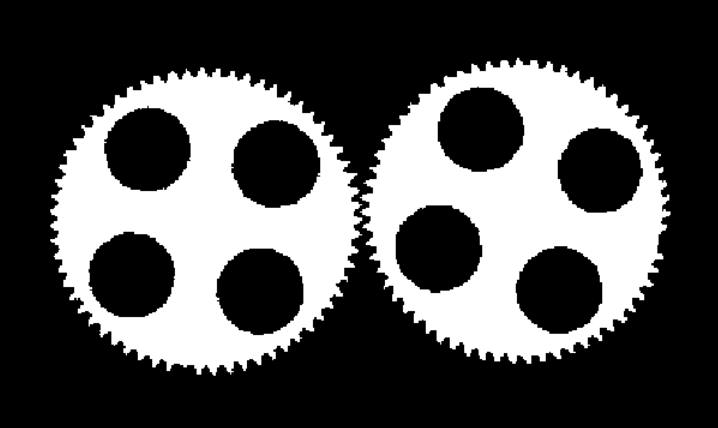

In [3]:
# загружаем исходное изображение
img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)
Image(filename="image.png")

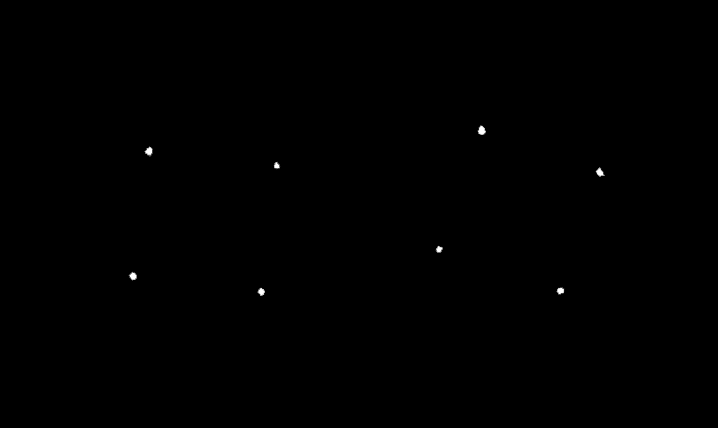

In [4]:
# шаг 1: получаем центры отверстий
elem1 = get_elem("hole_ring.jpg")
step1 = cv2.erode(img, elem1)
cv2.imwrite("step1.png", step1)
Image(filename='step1.png') 

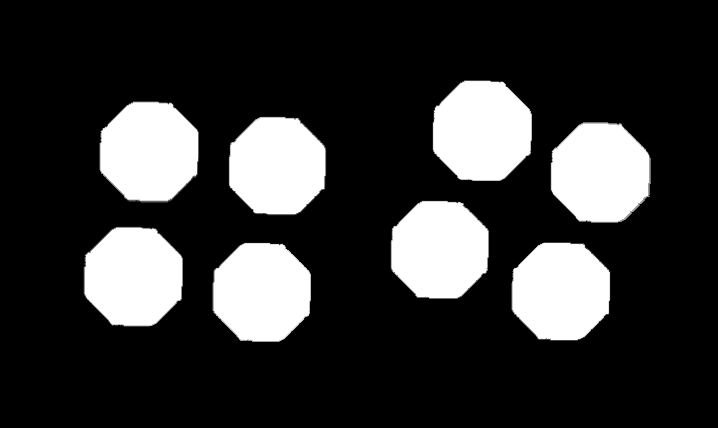

In [5]:
# шаг 2: получаем восьмиугольники на месте отверстий
elem2 = get_elem('hole_mask.jpg')
step2 = cv2.dilate(step1, elem2)
cv2.imwrite("step2.png", step2)
Image(filename="step2.png")

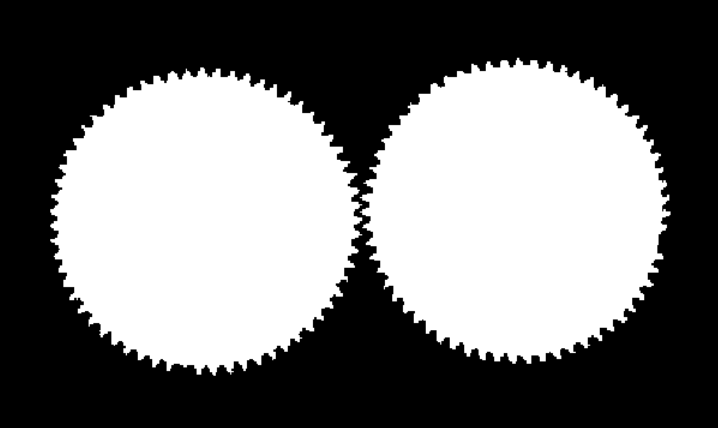

In [6]:
# шаг 3: заполняем отверстия шестерёнок
step3 = cv2.add(img, step2)
cv2.imwrite("step3.png", step3)
Image(filename="step3.png")

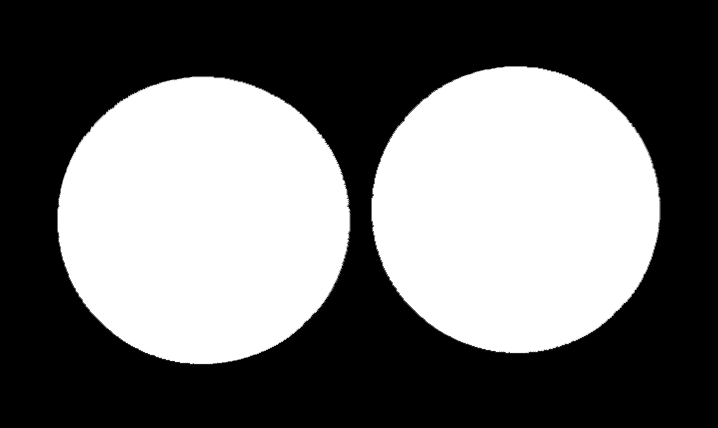

In [7]:
# шаг 4: получаем шестерёнки без зубьев
elem4 = get_elem('gear_ring.jpg')
step4 = cv2.morphologyEx(step3, cv2.MORPH_OPEN, elem4)
cv2.imwrite("step4.png", step4)
Image(filename="step4.png")

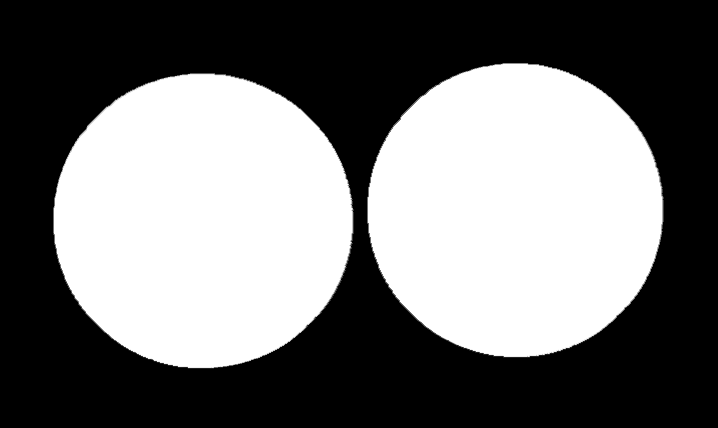

In [8]:
# шаг 5: увеличиваем диаметр шестерёнок с учётом зубцов
elem5 = get_elem('sampling_ring_spacer.jpg')
step5 = cv2.dilate(step4, elem5)
cv2.imwrite("step5.png", step5)
Image(filename="step5.png")

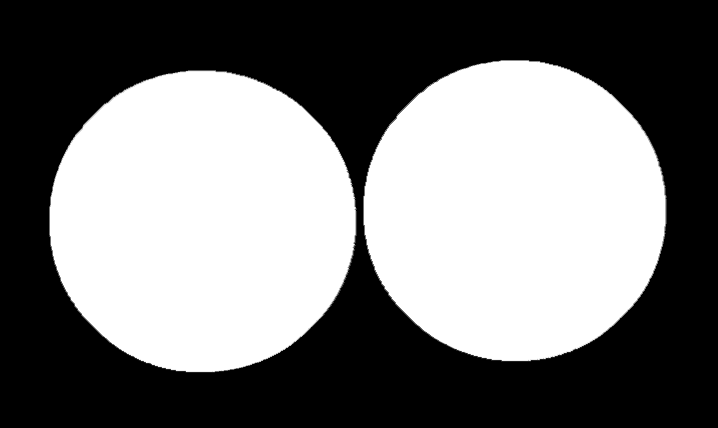

In [9]:
# шаг 6: повторяем шаг 5
step6 = cv2.dilate(step5, elem5)
cv2.imwrite("step6.png", step6)
Image(filename="step6.png")

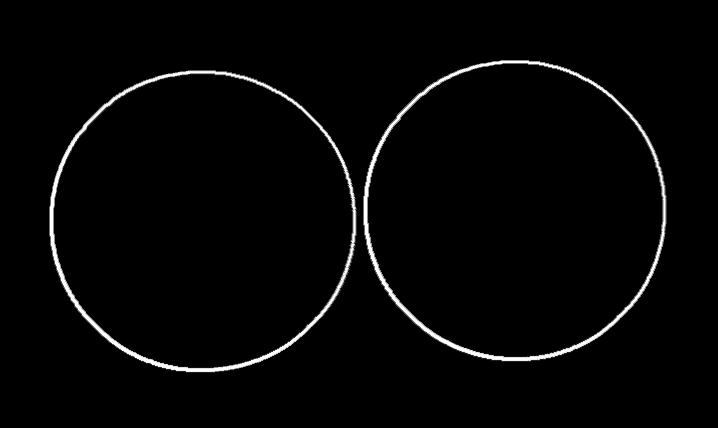

In [10]:
# шаг 7: получаем кольцо толщиной такой же, как наращение на шаге 5
step7 = cv2.subtract(step6, step5)
cv2.imwrite("step7.png", step7)
Image(filename="step7.png")

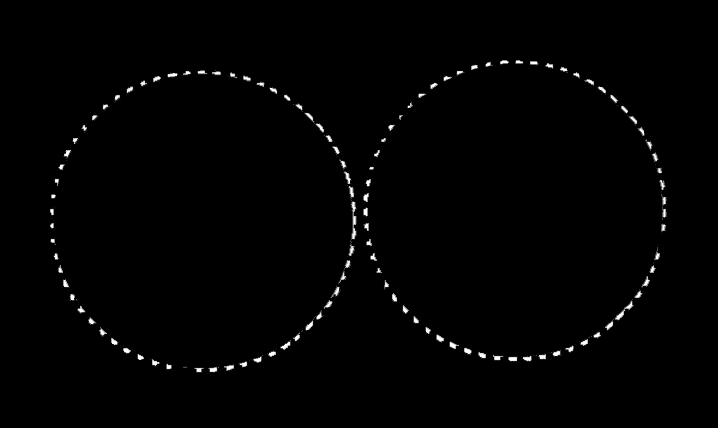

In [11]:
# шаг 8: выделяем зубцы
step8 = cv2.bitwise_and(step7, img)
cv2.imwrite("step8.png", step8)
Image(filename="step8.png")

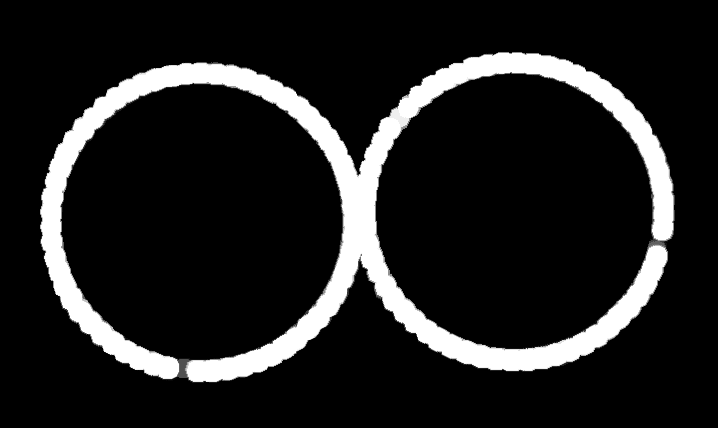

In [12]:
# шаг 9: устраняем зазоры между зубцами
elem9 = get_elem('tip_spacing.jpg')
step9 = cv2.dilate(step8, elem9)
step9 = cv2.dilate(step9, elem9)
cv2.imwrite("step9.png", step9)
Image(filename="step9.png")

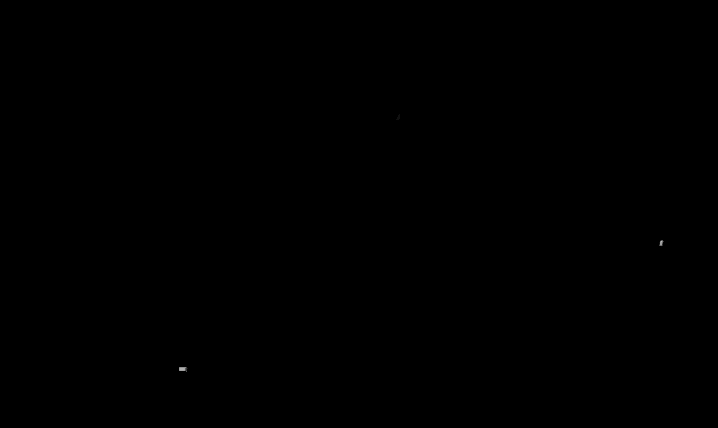

In [13]:
# шаг 10: получаем позиции с отсутствующими зубцами
step10 = cv2.subtract(step7, step9)
cv2.imwrite("step10.png", step10)
Image(filename="step10.png")

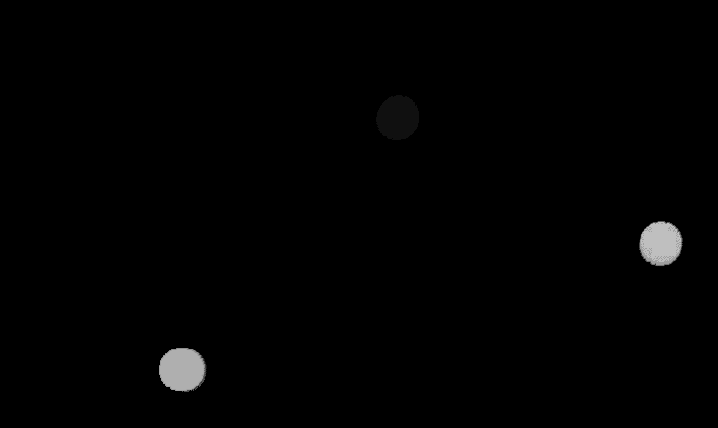

In [14]:
# шаг 11: выделяем позиции без зубцов
elem11 = get_elem('defect_cue.jpg')
step11 = cv2.dilate(step10, elem11)
cv2.imwrite("step11.png", step11)
Image(filename="step11.png")

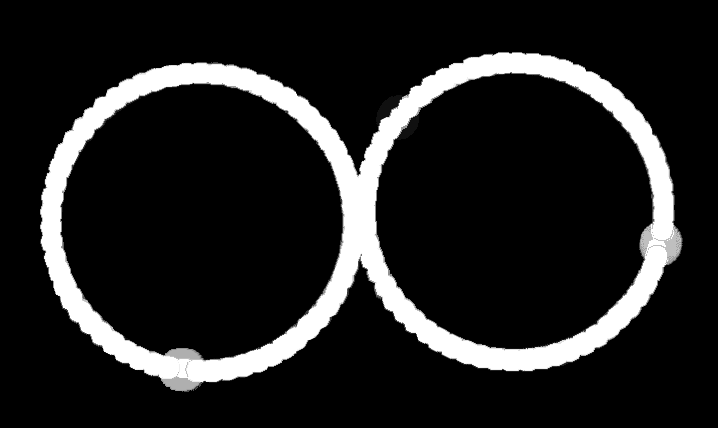

In [15]:
# шаг 12: получаем результат
step12 = cv2.bitwise_or(step11, step9)
cv2.imwrite("step12.png", step12)
Image(filename="step12.png")